In [1]:
from fastai.vision.all import *

In [2]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  get_y = parent_label,
                  splitter = RandomSplitter(),
                  item_tfms = Resize(224),
                  batch_tfms=aug_transforms(size=224))

In [3]:
squares = Path('combined')

In [4]:
dsets = dblock.datasets(squares)
dsets.train[0]

(PILImage mode=RGB size=117x117, TensorCategory(5))

In [5]:
dls = dblock.dataloaders(squares)

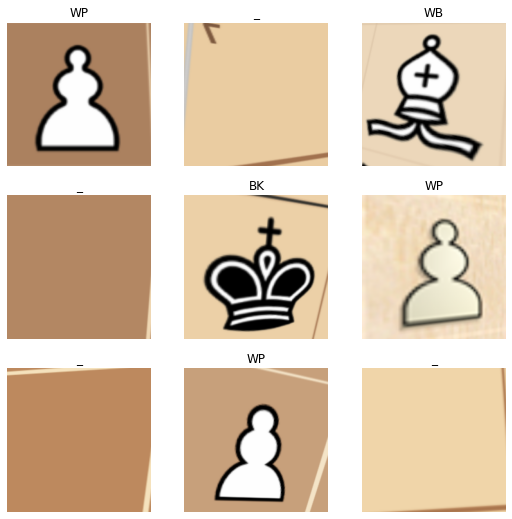

In [6]:
dls.show_batch()

In [8]:
learner = cnn_learner(dls, resnet18, pretrained=False, metrics=error_rate)

In [9]:
learner.fit(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.095020,3.120496,0.371508,00:07
1,0.657239,0.227328,0.083799,00:06
2,0.459214,0.022238,0.000000,00:06
3,0.310791,0.104377,0.027933,00:06
4,0.218615,0.496675,0.111732,00:06
5,0.162833,0.268588,0.069832,00:06
6,0.119926,0.083767,0.047486,00:06
7,0.092130,0.030936,0.019553,00:06
8,0.071346,0.001543,0.000000,00:06
9,0.058079,0.001586,0.000000,00:06


In [11]:
learner.export('latest.pkl')